In [41]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\david\AppData\R

# Analizando texto

In [42]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [43]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [44]:
print(len(text1))

260819


In [45]:
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [46]:
rl = len(vocabulario) / len(text1)
print(f"Riqueza Léxica: {rl}")

Riqueza Léxica: 0.07406285585022564


In [47]:
def riqueza_lexica(texto):
    vocabulario = sorted(set(texto))
    return len(vocabulario) / len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [48]:
def porcentaje_palabra(palabra, texto):
    return texto.count(palabra) / len(texto) * 100

In [49]:
porcentaje_palabra('monster', text1)

0.018786974875296663

# Estadistica del lenguaje

#### Metodo FreqDist de NLTK

In [50]:
fdist = FreqDist(text1)

In [51]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

<Axes: xlabel='Samples', ylabel='Counts'>

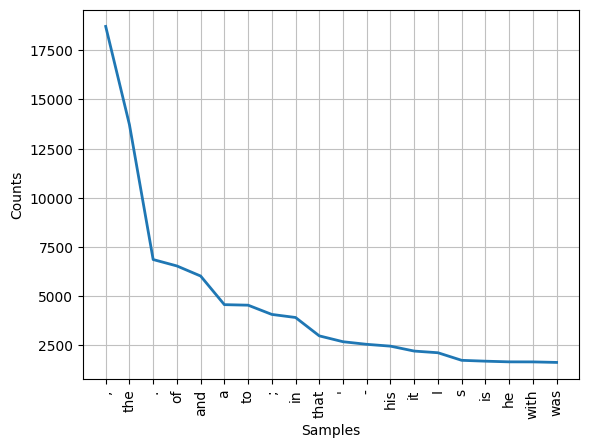

In [52]:
fdist.plot(20,)

In [53]:
fdist['monster']

49

## Dsitribuciones sobre contenido con filtro-fino

In [54]:
long_words = [palabra for palabra in set(text1) if len(palabra) > 5]

In [55]:
long_words

['person',
 'subsequent',
 'clamber',
 'unwarranted',
 'raises',
 'directing',
 'necessaries',
 'crunching',
 'painter',
 'TEENTH',
 'vibrating',
 'Jimmini',
 'decline',
 'Island',
 'imperiously',
 'discoursing',
 'longed',
 'gathering',
 'Merchant',
 'vacancies',
 'nautical',
 'homewards',
 'stingy',
 'survives',
 'hoping',
 'sprains',
 'stirring',
 'shrieking',
 'imagining',
 'breathest',
 'eddying',
 'unhinted',
 'prescribed',
 'sideways',
 'thorns',
 'eddyings',
 'Applied',
 'membranes',
 'bodily',
 'rouses',
 'adventure',
 'triumphant',
 'refugees',
 'misery',
 'Nature',
 'miniature',
 'stagnant',
 'supplants',
 'seeking',
 'peasants',
 'glutinous',
 'trained',
 'arithmetic',
 'tastes',
 'affected',
 'forgetful',
 'adjusting',
 'Partly',
 'muffling',
 'schoolmasters',
 'Heidelburgh',
 'dimmed',
 'Muffled',
 'distant',
 'Ganders',
 'forbearing',
 'shouts',
 'unsavory',
 'levers',
 'rugged',
 'clover',
 'inquire',
 'barbacued',
 'DISCOVERS',
 'sunniest',
 'Procopius',
 'shuttle',
 '

In [56]:
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:20]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA',
 'ANCHORS',
 'ANIMAL',
 'ANNALS',
 'ANOTHER',
 'APOLOGY',
 'APPLICATION',
 'APPROACHING',
 'ARCTIC',
 'AROUND',
 'ASCENDING']

In [57]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra) > 5 and fdist[palabra] > 10]

In [58]:
palabras_interesantes

[('person', 28),
 ('subsequent', 13),
 ('sideways', 27),
 ('bodily', 26),
 ('seeking', 12),
 ('distant', 21),
 ('malice', 12),
 ('lovely', 11),
 ('plenty', 16),
 ('bucket', 15),
 ('Because', 19),
 ('naught', 13),
 ('sweeping', 12),
 ('coffin', 36),
 ('points', 14),
 ('buried', 14),
 ('modern', 18),
 ('anything', 41),
 ('gigantic', 20),
 ('spread', 24),
 ('repose', 11),
 ('floating', 24),
 ('numerous', 16),
 ('flukes', 36),
 ('tackle', 11),
 ('instances', 30),
 ('Nantucketer', 22),
 ('Greenland', 35),
 ('fairly', 16),
 ('resting', 12),
 ('interval', 25),
 ('however', 80),
 ('future', 14),
 ('finally', 23),
 ('received', 26),
 ('yellow', 22),
 ('monster', 49),
 ('binnacle', 16),
 ('family', 12),
 ('learned', 25),
 ('hanging', 19),
 ('rapidly', 19),
 ('particular', 49),
 ('strangely', 29),
 ('barrels', 16),
 ('boiling', 15),
 ('whispered', 11),
 ('touching', 45),
 ('stranger', 48),
 ('connected', 12),
 ('central', 11),
 ('originally', 16),
 ('trying', 17),
 ('matter', 86),
 ('straits', 11

In [59]:
dtypes = [('wrold', 'S10'), ('frecuency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)

In [60]:
palabras_interesantes

array([(b'person',  28), (b'subsequent',  13), (b'sideways',  27),
       (b'bodily',  26), (b'seeking',  12), (b'distant',  21),
       (b'malice',  12), (b'lovely',  11), (b'plenty',  16),
       (b'bucket',  15), (b'Because',  19), (b'naught',  13),
       (b'sweeping',  12), (b'coffin',  36), (b'points',  14),
       (b'buried',  14), (b'modern',  18), (b'anything',  41),
       (b'gigantic',  20), (b'spread',  24), (b'repose',  11),
       (b'floating',  24), (b'numerous',  16), (b'flukes',  36),
       (b'tackle',  11), (b'instances',  30), (b'Nantuckete',  22),
       (b'Greenland',  35), (b'fairly',  16), (b'resting',  12),
       (b'interval',  25), (b'however',  80), (b'future',  14),
       (b'finally',  23), (b'received',  26), (b'yellow',  22),
       (b'monster',  49), (b'binnacle',  16), (b'family',  12),
       (b'learned',  25), (b'hanging',  19), (b'rapidly',  19),
       (b'particular',  49), (b'strangely',  29), (b'barrels',  16),
       (b'boiling',  15), (b'whispe

In [63]:
palabras_interesantes = np.sort(palabras_interesantes,order="frecuency")
palabras_interesantes

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

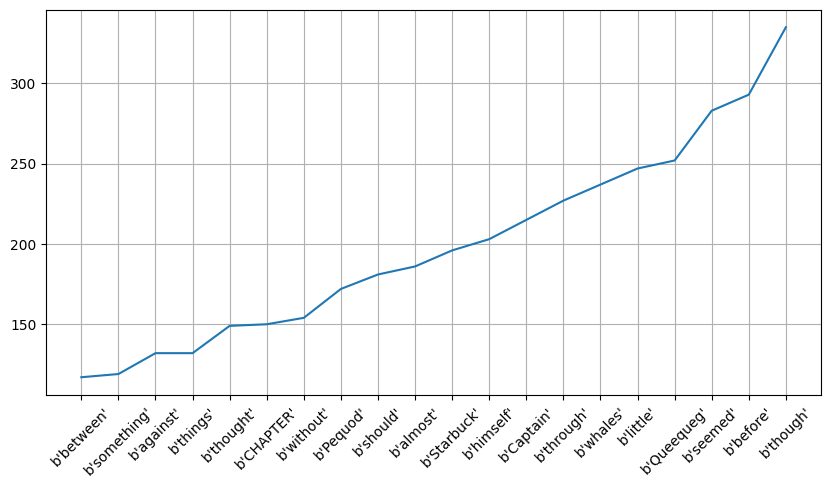

In [65]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation=45)
plt.grid()
plt.show()